# Histogramas y Funciones de Densidad

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/jmorano/Documents/Plantillas personalizadas de Office/Coderhouse/Data Science/Modulo 2 - Data Science Fundamentos para la Ciencia de Datos II/Proyecto - Juan Martin Morano/Data/Processed/full_data_flightdelay_processed.csv', sep=',')

In [9]:
# Función para clasificar columnas en continuas, discretas y categóricas
def classify_columns(df):
    # Identificar columnas numéricas y categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns
    discrete_columns = [col for col in df.select_dtypes(include=['int']).columns if df[col].nunique() < 20]
    continuous_columns = [col for col in df.select_dtypes(include=['float', 'int']).columns if col not in discrete_columns]
    
    return discrete_columns, continuous_columns, categorical_columns

discrete_columns, continuous_columns, categorical_columns = classify_columns(df)

if 'Unnamed: 0' in continuous_columns:
    continuous_columns.remove('Unnamed: 0')

print("Discretas:", discrete_columns)
print("Continuas:", continuous_columns)
print("Categóricas:", categorical_columns)

Discretas: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'AVG_MONTHLY_PASS_AIRLINE']
Continuas: ['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
Categóricas: Index(['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT'],
      dtype='object')


## Distribución de Variables Continuas

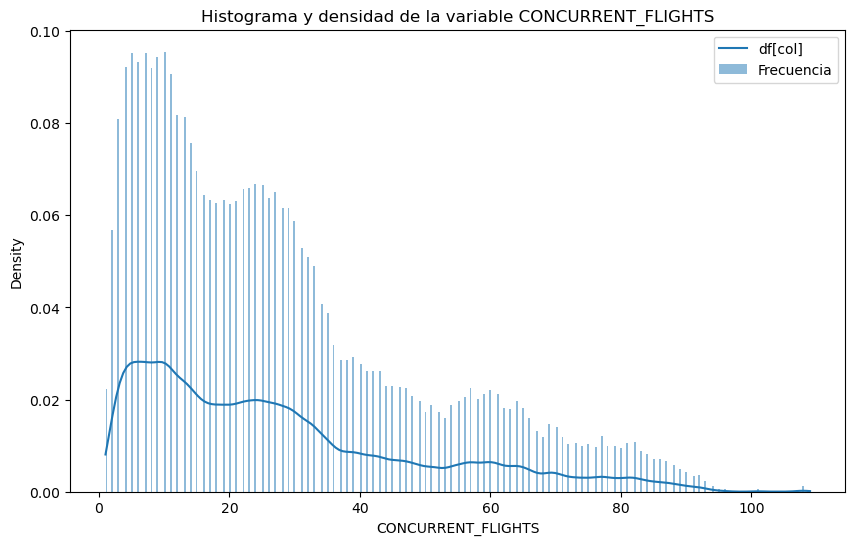

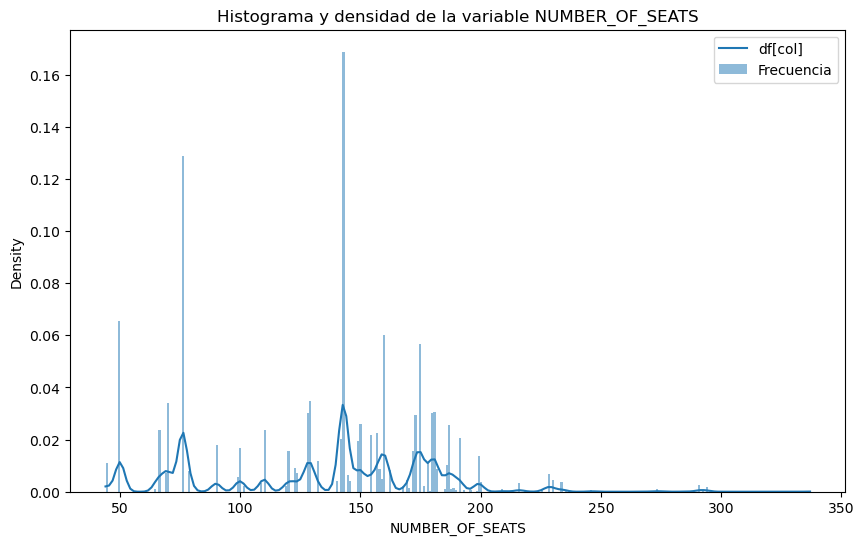

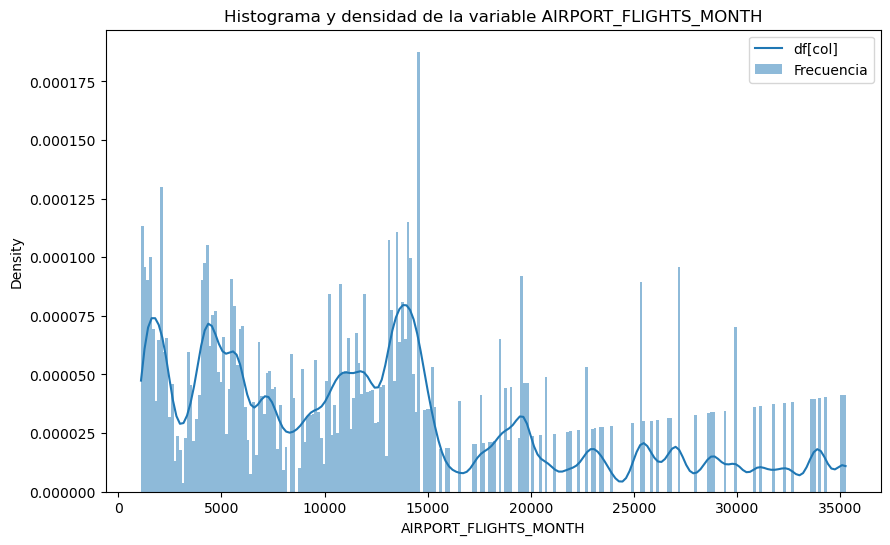

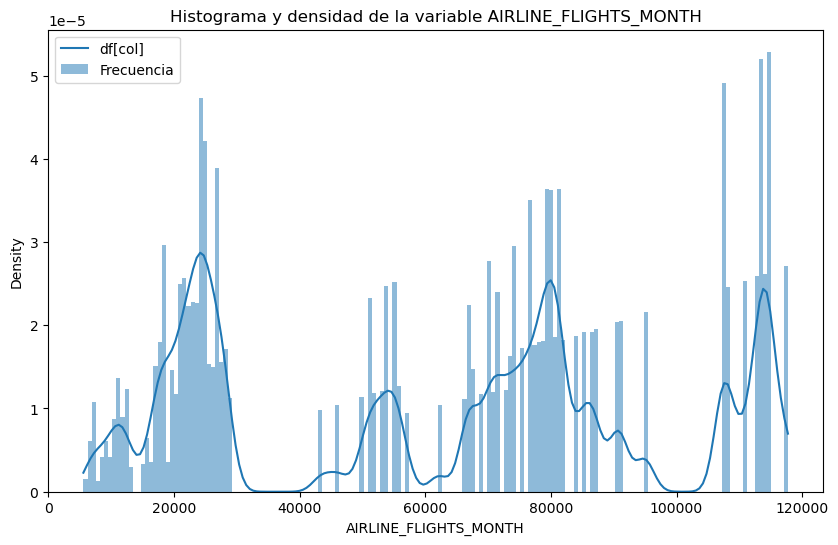

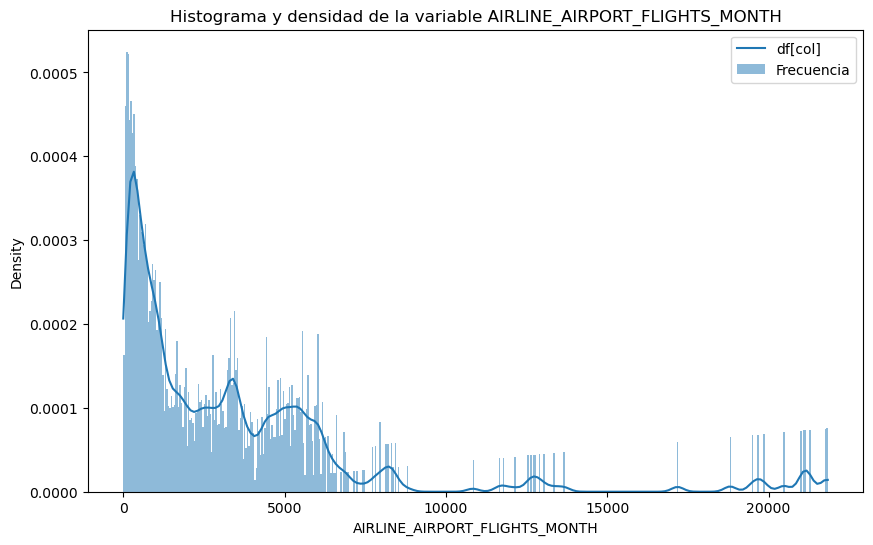

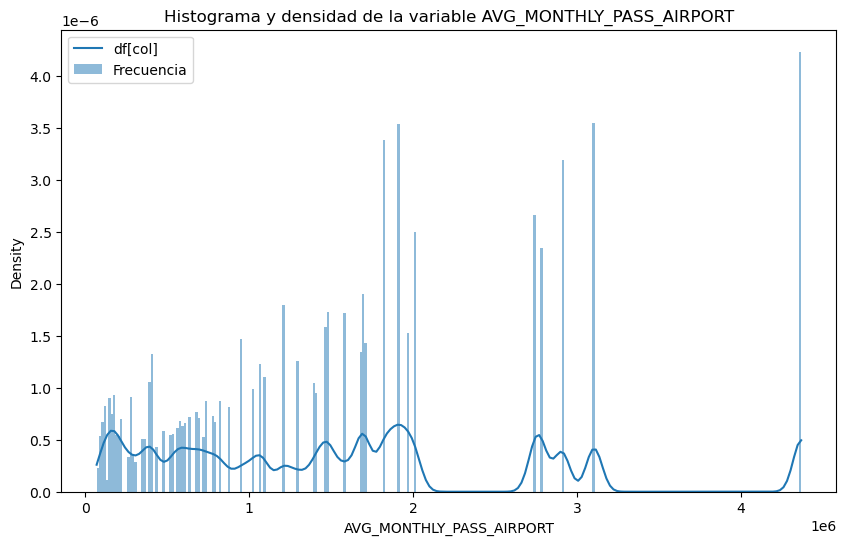

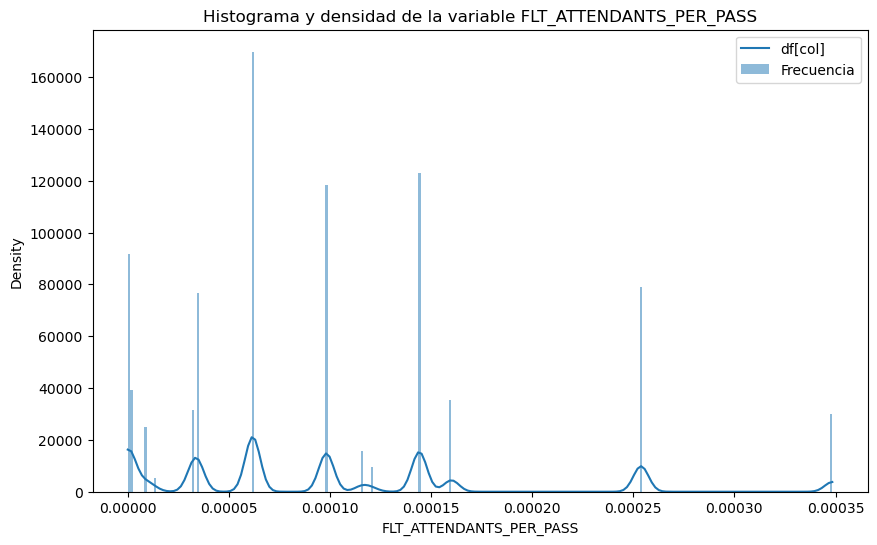

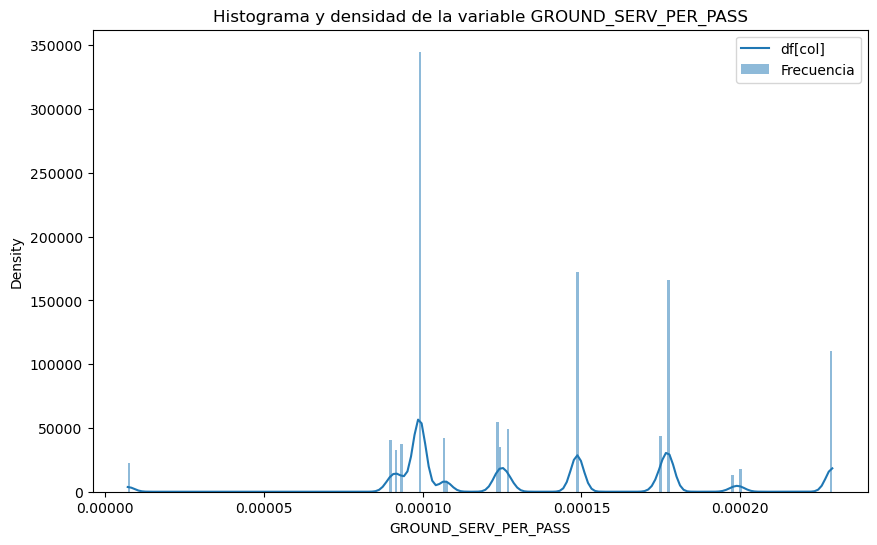

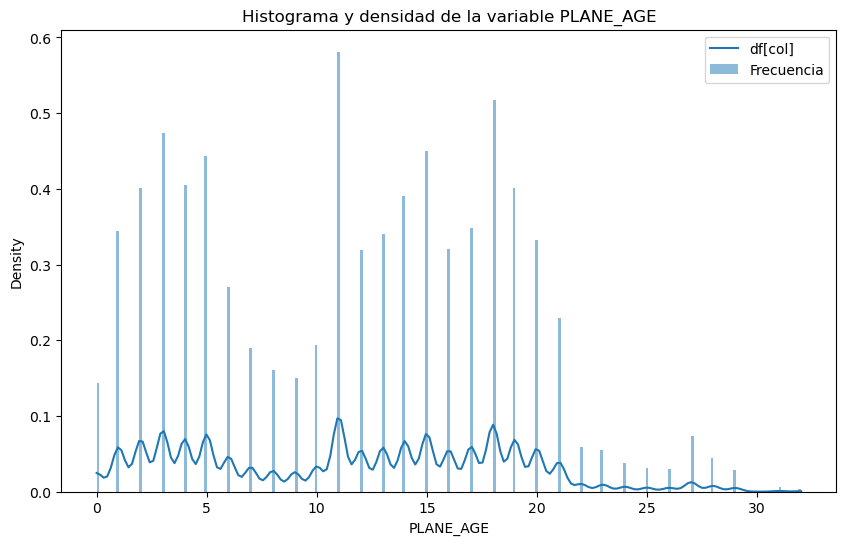

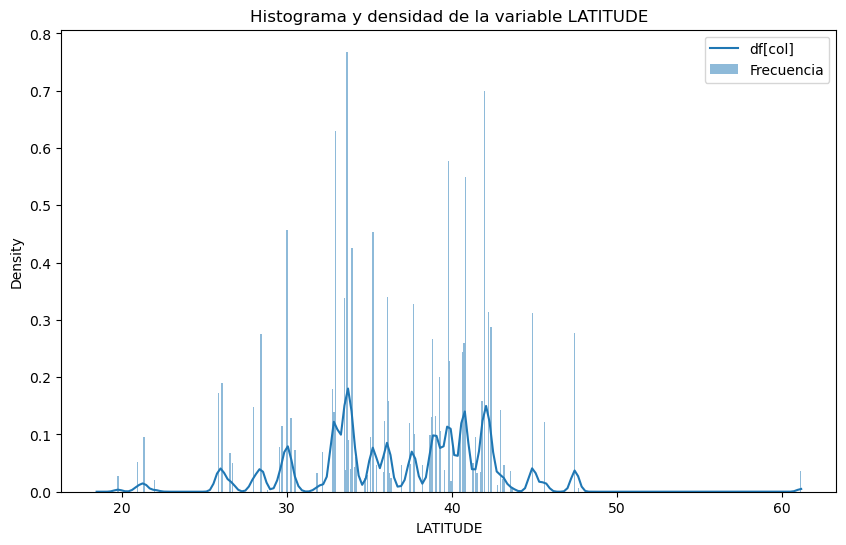

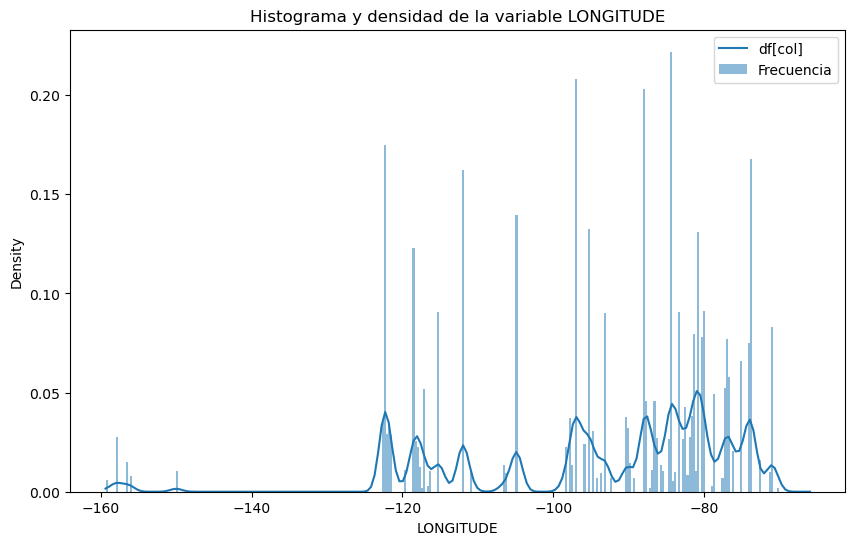

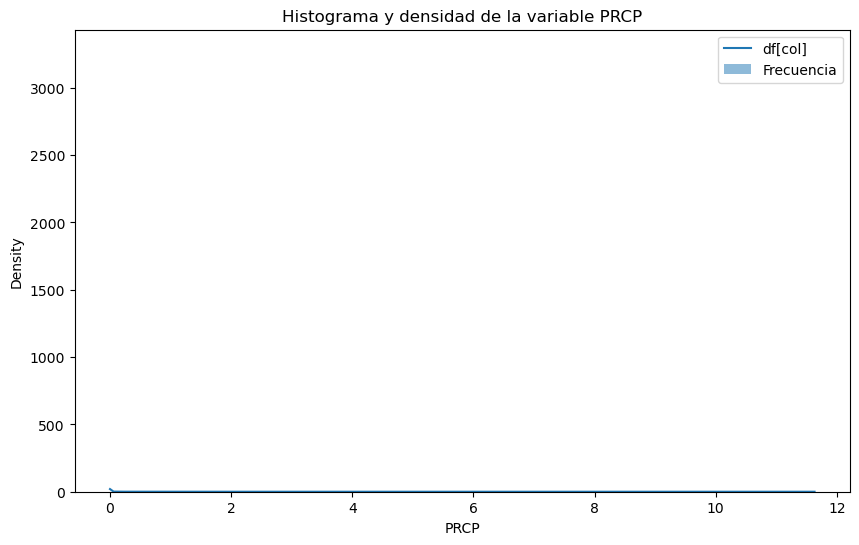

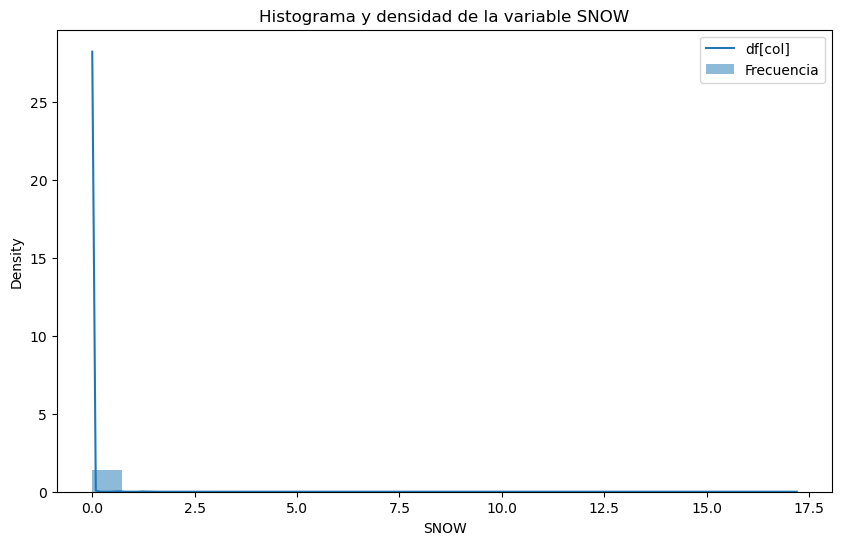

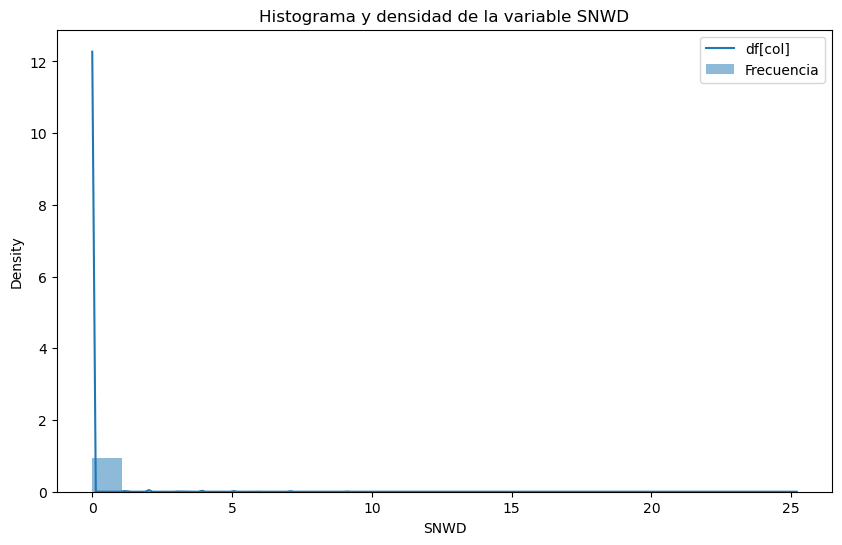

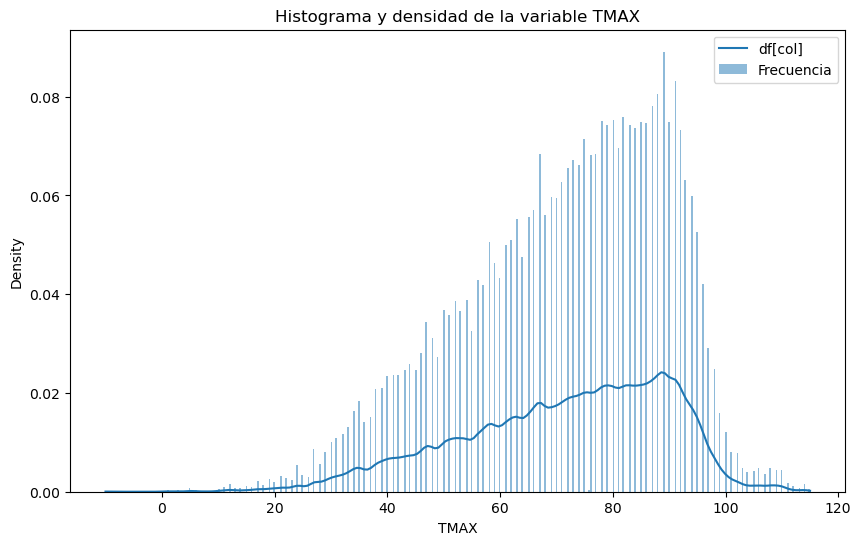

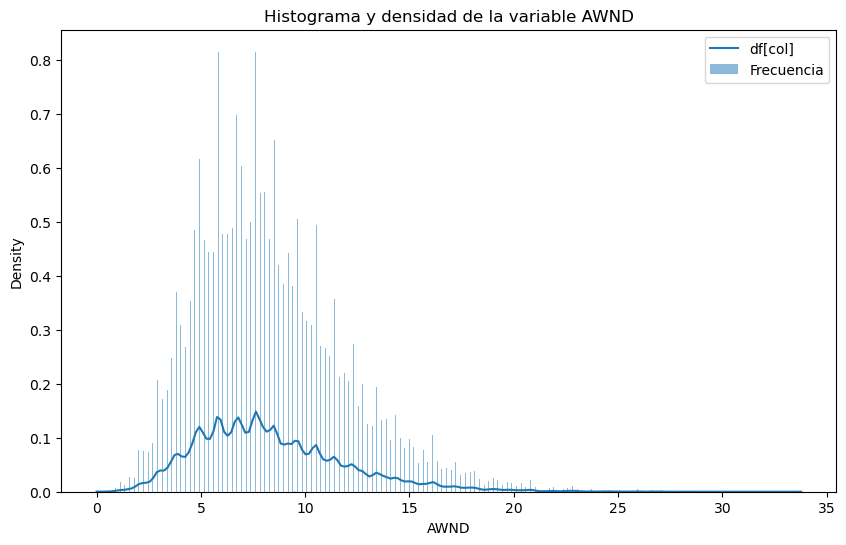

In [27]:
#Sacamos un gráfico de distribución por cada una de las variables continuas
#para poder tener una primera visualización de todas las variables

for col in continuous_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, stat='density', linewidth=0)
    plt.legend(labels=['df[col]', 'Frecuencia'])
    plt.title(f'Histograma y densidad de la variable {col}')
    plt.show()

## Variaciones Significativas en los Comportamientos de las Variables

### VARIABLES OPERACIONALES

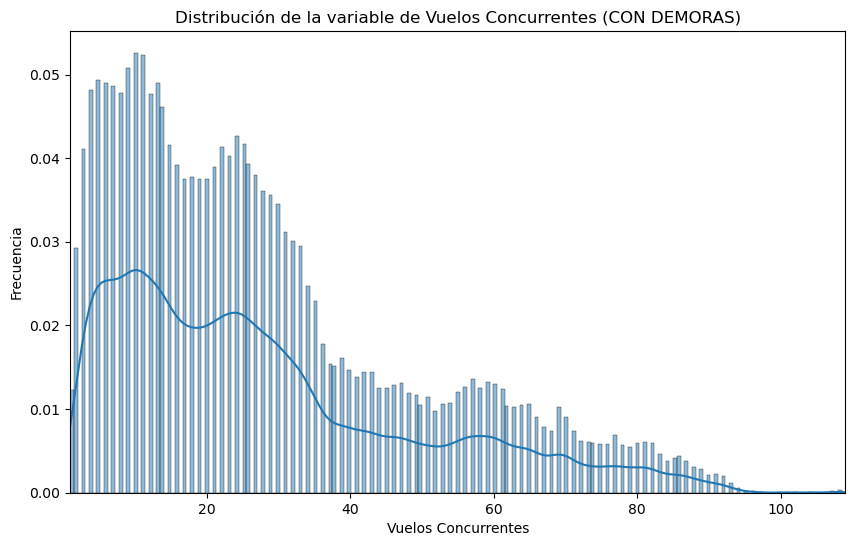

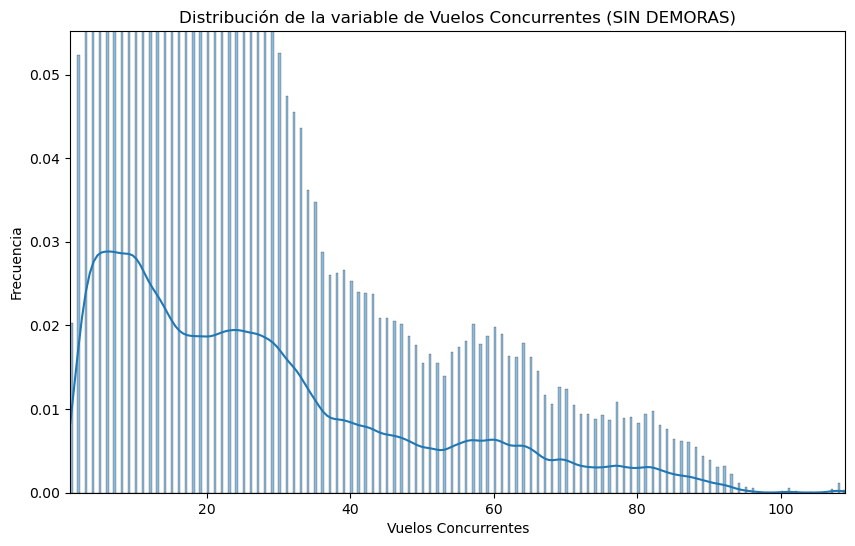

In [9]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['CONCURRENT_FLIGHTS'].min(), df_SD['CONCURRENT_FLIGHTS'].min())
max_x = max(df_CD['CONCURRENT_FLIGHTS'].max(), df_SD['CONCURRENT_FLIGHTS'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['CONCURRENT_FLIGHTS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['CONCURRENT_FLIGHTS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (SIN DEMORAS)')
plt.show()

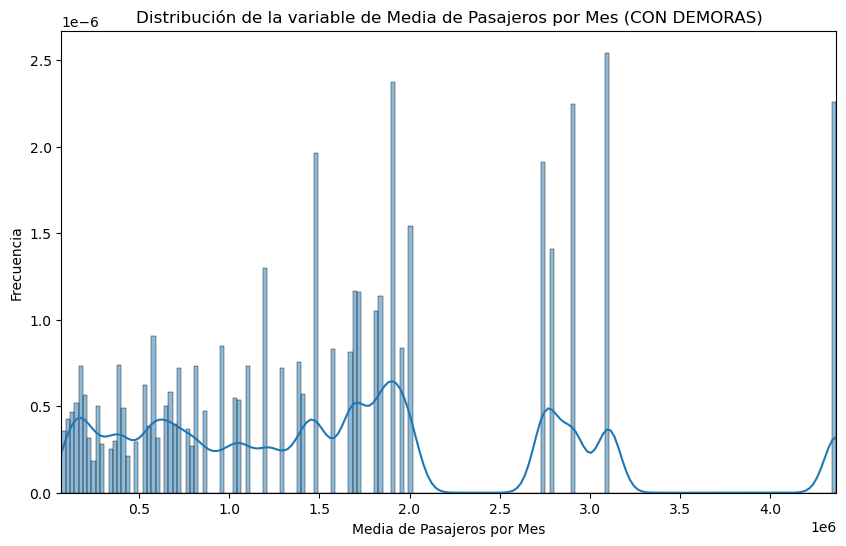

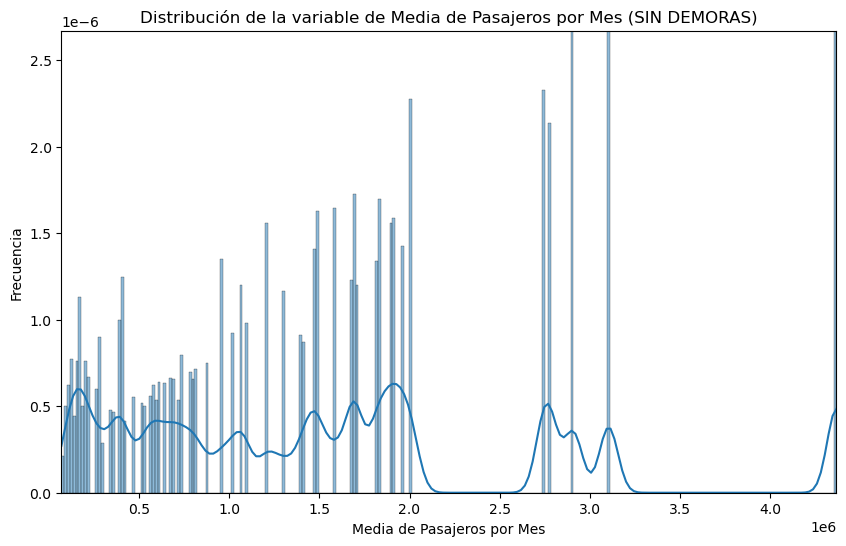

In [35]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['AVG_MONTHLY_PASS_AIRPORT'].min(), df_SD['AVG_MONTHLY_PASS_AIRPORT'].min())
max_x = max(df_CD['AVG_MONTHLY_PASS_AIRPORT'].max(), df_SD['AVG_MONTHLY_PASS_AIRPORT'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['AVG_MONTHLY_PASS_AIRPORT'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Media de Pasajeros por Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Media de Pasajeros por Mes (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['AVG_MONTHLY_PASS_AIRPORT'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Media de Pasajeros por Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Media de Pasajeros por Mes (SIN DEMORAS)')
plt.show()

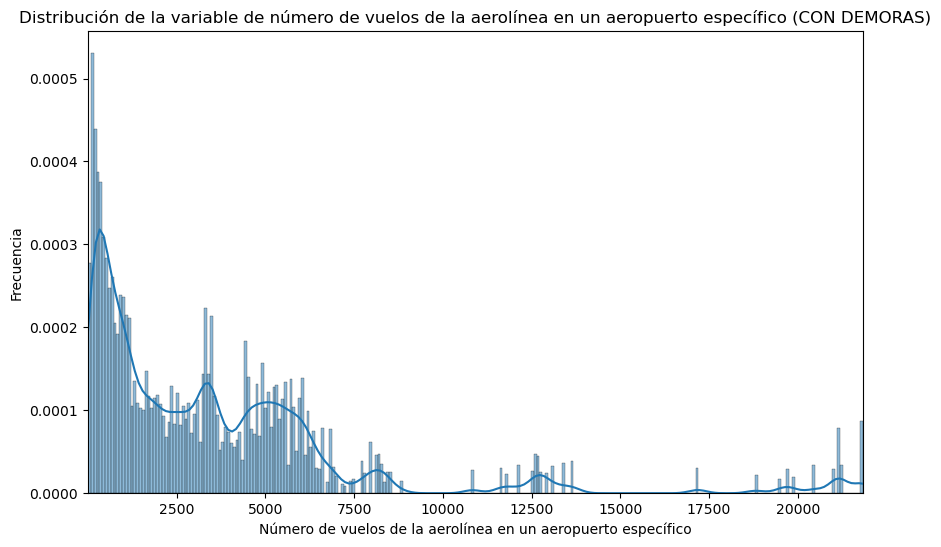

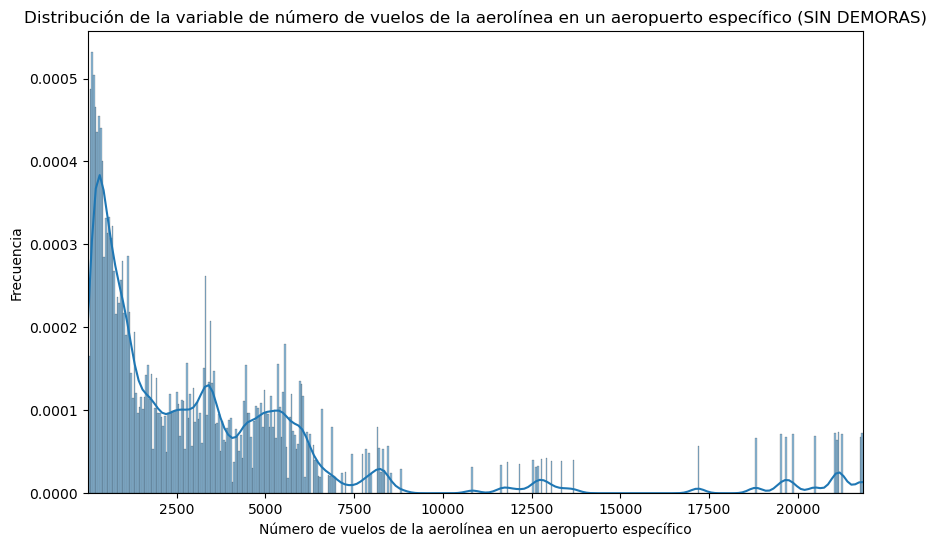

In [37]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].min(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].min())
max_x = max(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].max(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (SIN DEMORAS)')
plt.show()

### VARIABLES CLIMÁTICAS

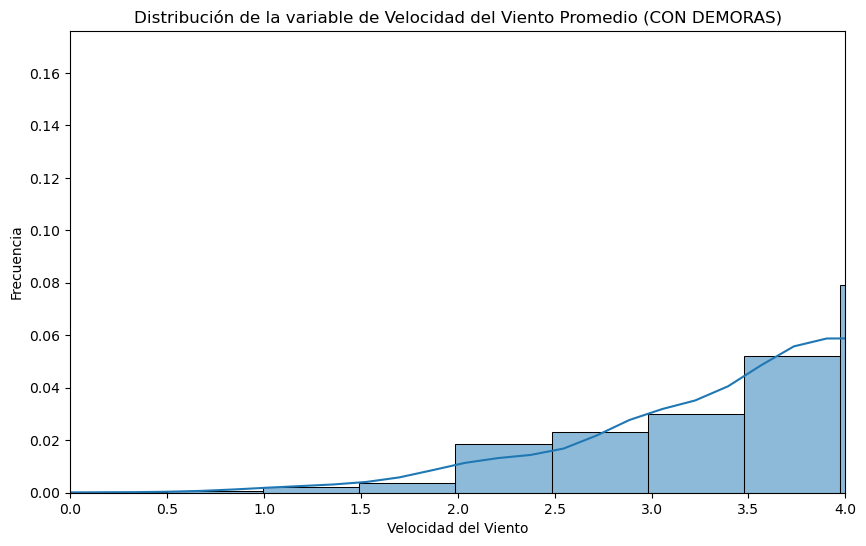

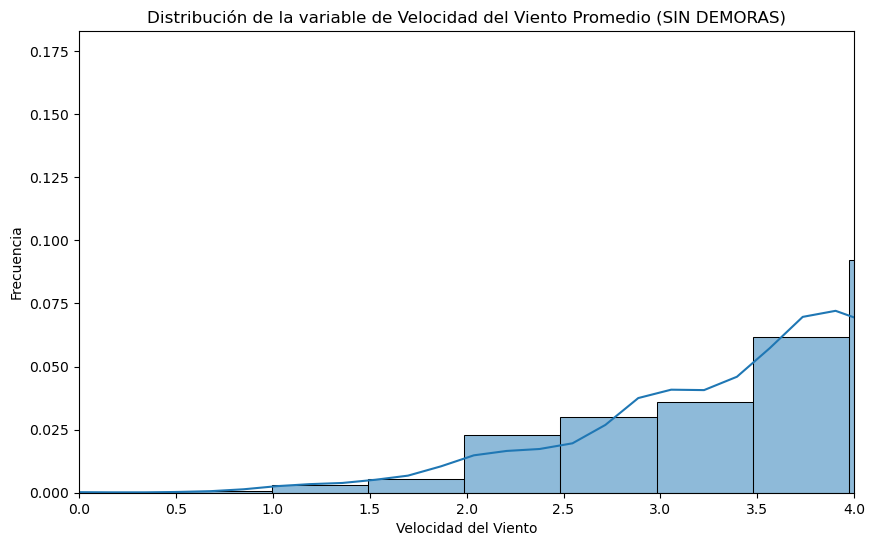

In [10]:
# Filtrar por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_CD['AWND'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Velocidad del Viento Promedio (CON DEMORAS)')
plt.xlim(0, 4)
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_SD['AWND'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Velocidad del Viento Promedio (SIN DEMORAS)')
plt.xlim(0, 4)
plt.show()

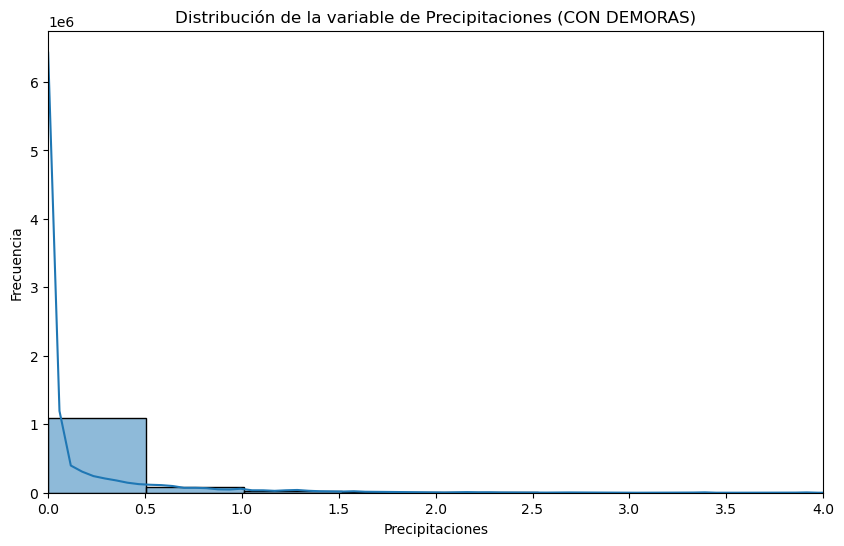

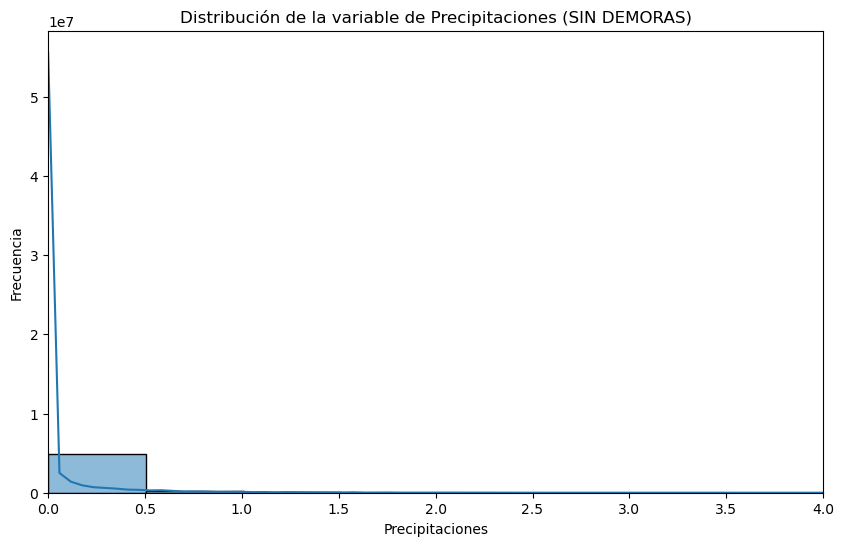

In [20]:
# Filtrar por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_CD['PRCP'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Precipitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Precipitaciones (CON DEMORAS)')
plt.xlim(0, 4)
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_SD['PRCP'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Precipitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Precipitaciones (SIN DEMORAS)')
plt.xlim(0, 4)
plt.show()

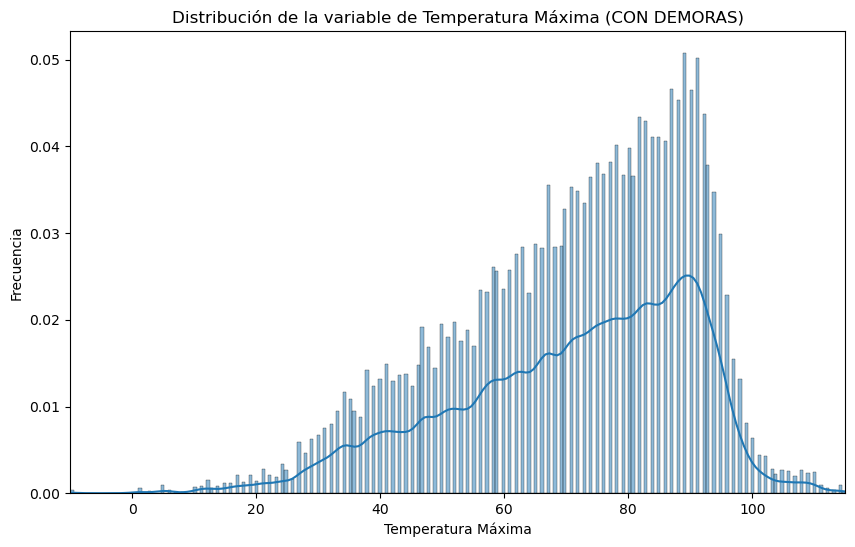

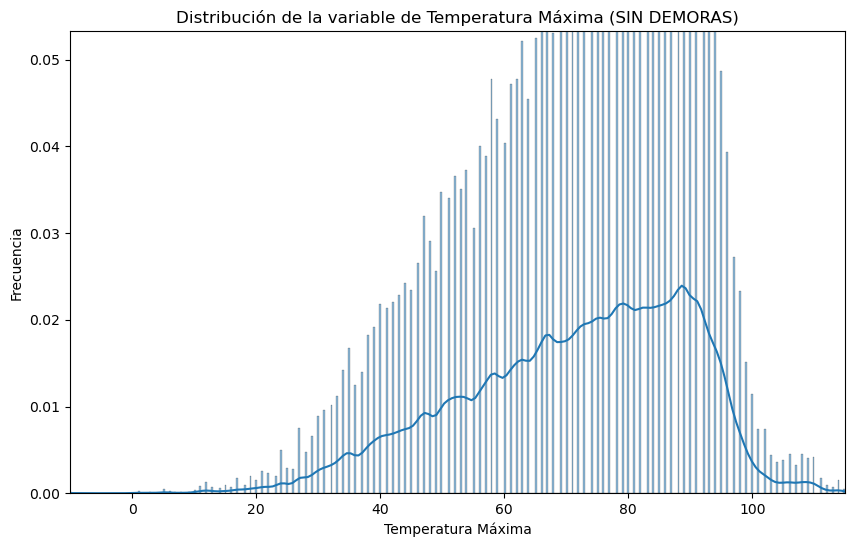

In [39]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['TMAX'].min(), df_SD['TMAX'].min())
max_x = max(df_CD['TMAX'].max(), df_SD['TMAX'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['TMAX'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['TMAX'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (SIN DEMORAS)')
plt.show()

### OTRAS VARIABLES

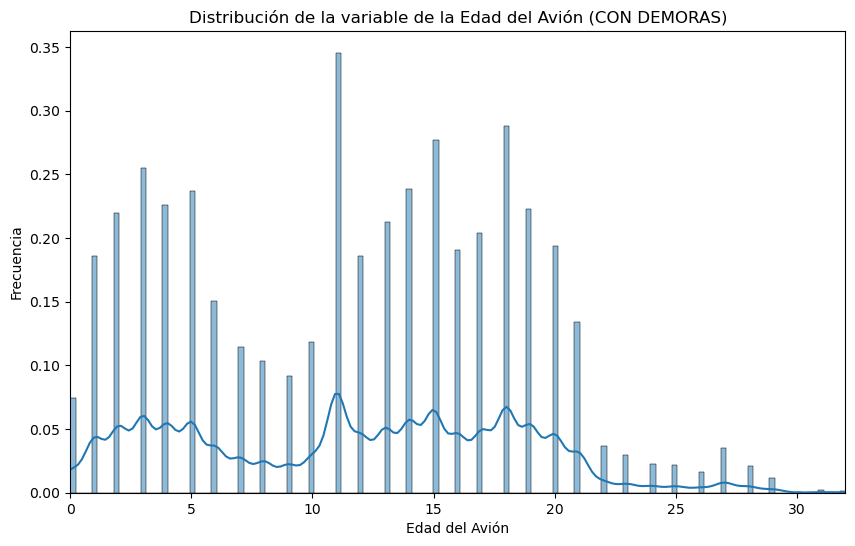

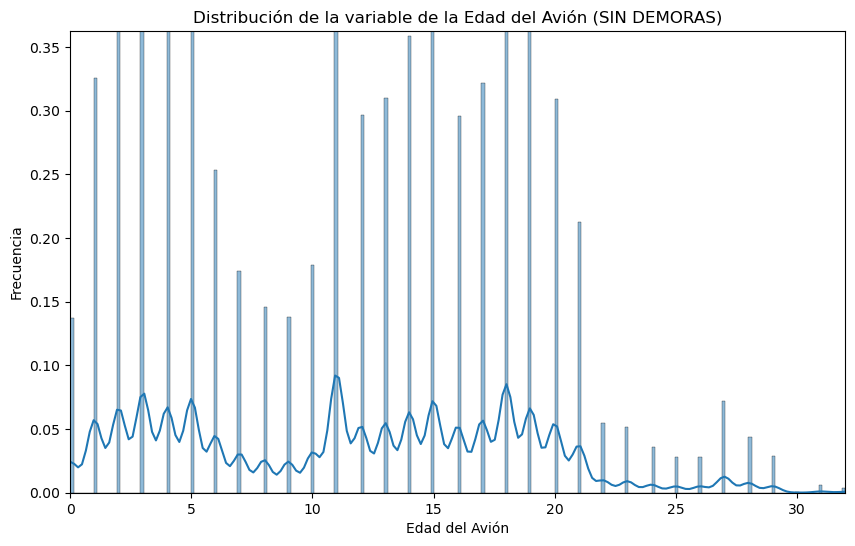

In [41]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['PLANE_AGE'].min(), df_SD['PLANE_AGE'].min())
max_x = max(df_CD['PLANE_AGE'].max(), df_SD['PLANE_AGE'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['PLANE_AGE'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Edad del Avión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de la Edad del Avión (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['PLANE_AGE'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Edad del Avión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de la Edad del Avión (SIN DEMORAS)')
plt.show()

## Estadística Inferencial - Establecimiento de Hipótesis

In [50]:
#Análisis con Muestra
media_con_demora = df_CD.mean()
media_sin_demora = df_SD.mean()

print(f'La media de Vuelos Concurrentes con demora es de {media_con_demora}')
print(f'La media de Vuelos Concurrentes con demora es de {media_sin_demora}')

La media de Vuelos Concurrentes con demora es de 28.23469527538638
La media de Vuelos Concurrentes con demora es de 27.74728014943249


In [44]:
from scipy.stats import ttest_ind

# Filtrar los datos por nomenclatura establecida
df_CD = df[df['DEP_DEL15'] == 1]['CONCURRENT_FLIGHTS']
df_SD = df[df['DEP_DEL15'] == 0]['CONCURRENT_FLIGHTS']

# Realizaremos el test de diferencias de medias en función de una prueba con el estadístico "T de Student"
t_stat, p_value = ttest_ind(df_CD, df_SD)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Evaluar el resultado
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa entre las medias de los vuelos concurrentes para los vuelos CON demora y SIN demora. Por lo cual, existe evidencia suficiente para rechazar la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula: No existe una diferencia significativa entre las medias de los vuelos concurrentes para los vuelos CON demora y SIN demora. Por lo cual, no existe evidencia suficiente para rechazar la hipótesis nula")

t-statistic: 22.573446110490842
p-value: 7.984073160683707e-113
Rechazamos la hipótesis nula: Existe una diferencia significativa entre las medias de los vuelos concurrentes para los vuelos CON demora y SIN demora. Por lo cual, existe evidencia suficiente para rechazar la hipótesis nula


## Optimización de Modelos

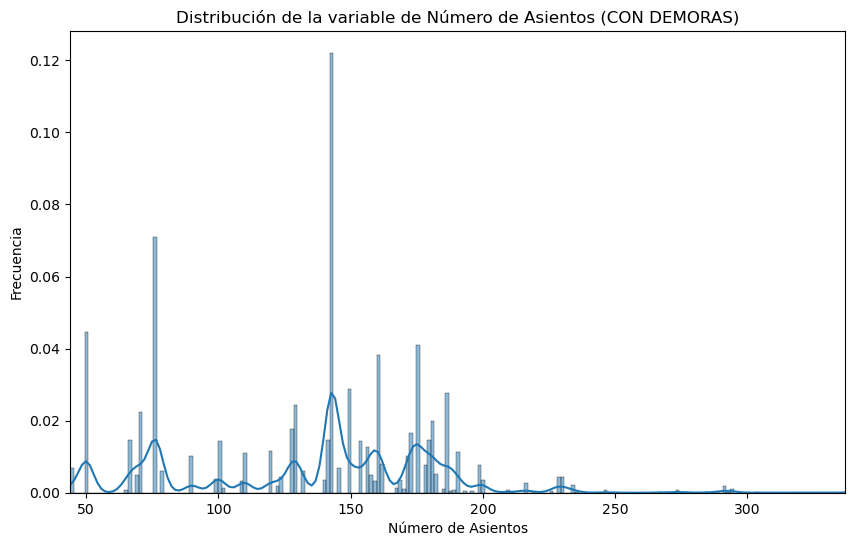

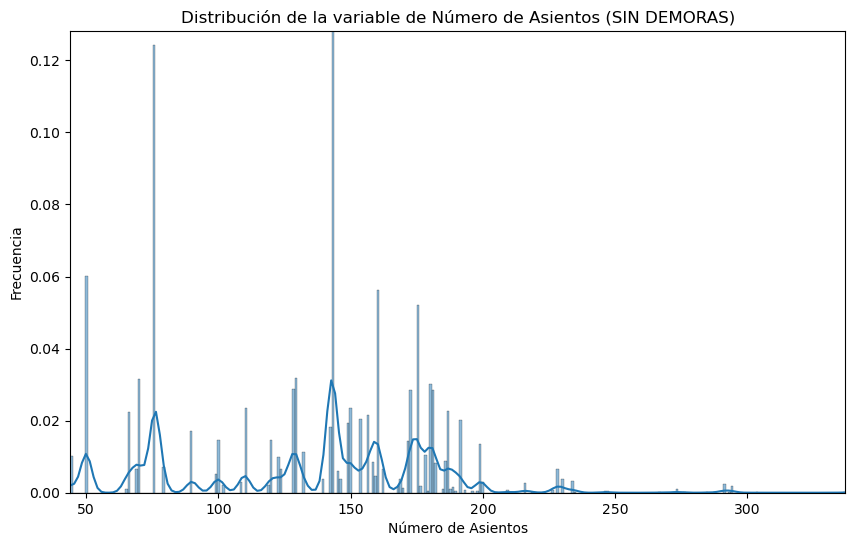

In [12]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['NUMBER_OF_SEATS'].min(), df_SD['NUMBER_OF_SEATS'].min())
max_x = max(df_CD['NUMBER_OF_SEATS'].max(), df_SD['NUMBER_OF_SEATS'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['NUMBER_OF_SEATS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Número de Asientos (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['NUMBER_OF_SEATS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Número de Asientos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Número de Asientos (SIN DEMORAS)')
plt.show()

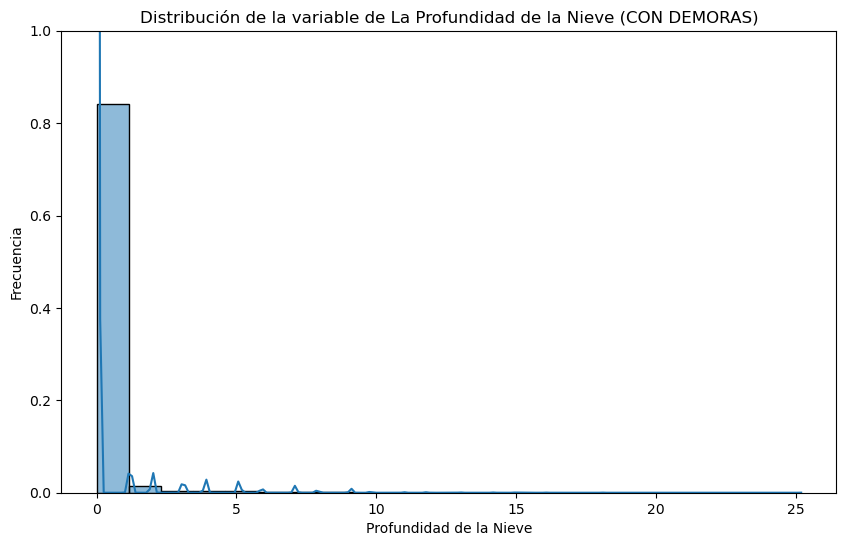

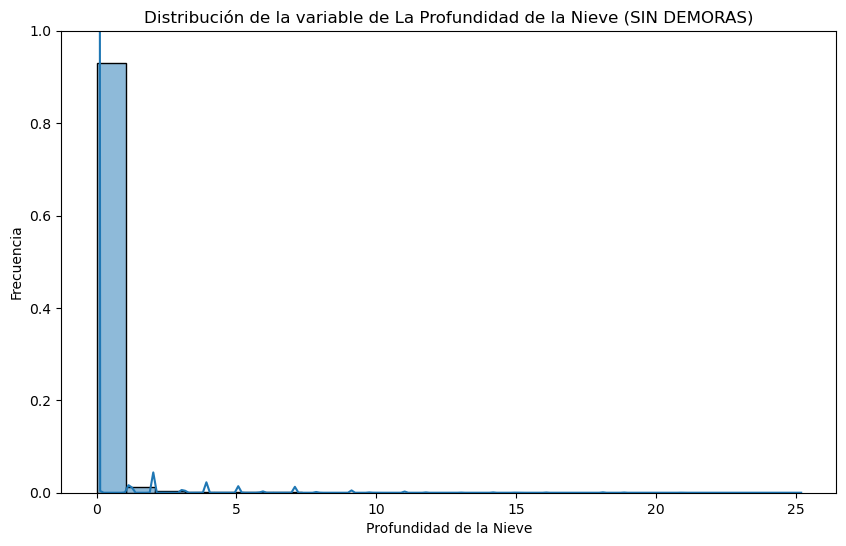

In [28]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

max_y = 1

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['SNWD'], kde=True, stat='density')
plt.ylim(0, max_y)
plt.xlabel('Profundidad de la Nieve')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de La Profundidad de la Nieve (CON DEMORAS)')
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['SNWD'], kde=True, stat='density')
plt.ylim(0, max_y)
plt.xlabel('Profundidad de la Nieve')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de La Profundidad de la Nieve (SIN DEMORAS)')
plt.show()

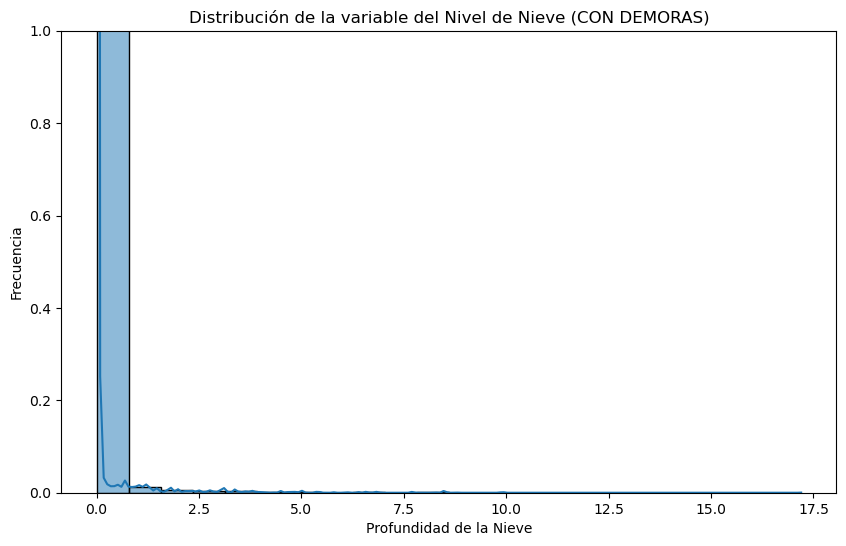

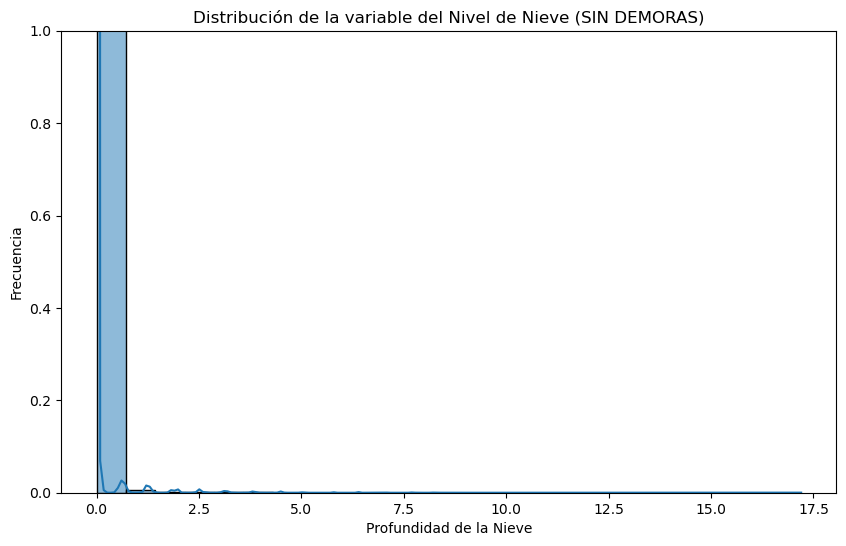

In [32]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

max_y = 1

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['SNOW'], kde=True, stat='density')
plt.ylim(0, max_y)
plt.xlabel('Profundidad de la Nieve')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable del Nivel de Nieve (CON DEMORAS)')
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['SNOW'], kde=True, stat='density')
plt.ylim(0, max_y)
plt.xlabel('Profundidad de la Nieve')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable del Nivel de Nieve (SIN DEMORAS)')
plt.show()